In [1]:
# import pathlib
#import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

#from string import ascii_letters

In [2]:
def file_to_pd(filename, label):
    hdf5_file = h5.File("../h5/scalar_"+filename, "r")
    dataset = hdf5_file["vector_data"]
    df = pd.DataFrame()
    for i, name in enumerate(["met_et","jet_n","lep_n","jet_m","alljet_n"]):
        df[name] = pd.Series(np.ravel(dataset[i]))
    hdf5_file = h5.File("../h5/vector_"+filename, "r")
    dataset = hdf5_file["vector_data"]
    for n, name in enumerate(["lep_pt", "lep_eta", "lep_phi", "lep_E", "lep_charge", "lep_ptcone30", "jet_pt", "jet_eta", "jet_phi", "jet_E"]):
        for i in range(dataset.shape[2]):
            df[name+'_'+str(i)] = pd.Series(dataset[n,:,i])
    df["label"] = pd.Series(np.ones(dataset.shape[1])*label)
    return df

In [3]:
df_gg_4l  = file_to_pd("ggH_ZZ4l.h5",0)
df_VBF_4l = file_to_pd("VBFH_ZZ4l.h5",0)
df_gg_2l  = file_to_pd("ggH_WW2l2nu.h5",1)
df_VBF_2l = file_to_pd("VBFH_WW2l2nu.h5",1)
df_400    = file_to_pd("Z400.h5",2)
df_500    = file_to_pd("Z500.h5",2)
df_750    = file_to_pd("Z750.h5",2)
df_1000   = file_to_pd("Z1000.h5",2)
df_1250   = file_to_pd("Z1250.h5",2)
df = pd.concat([df_gg_4l, df_VBF_4l, df_gg_2l, df_VBF_2l, df_400,df_500, df_750, df_1000, df_1250],ignore_index=True)
df['label'] = df['label'].astype(int)
features = list(df)[:-1]

In [4]:
 X_train, X_test, y_train, y_test = train_test_split( df[features], df['label'], test_size=0.1, random_state=42)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84],
 [Text(0, 0, 'met_et'),
  Text(1, 0, 'lep_pt_2'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_E_1'),
  Text(5, 0, 'jet_pt_0'),
  Text(6, 0, 'lep_eta_0'),
  Text(7, 0, 'lep_pt_0'),
  Text(8, 0, 'lep_eta_1'),
  Text(9, 0, 'jet_pt_1'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_phi_0'),
  Text(12, 0, 'lep_phi_1'),
  Text(13, 0, 'lep_n'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'lep_ptcone30_1'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'jet_eta_0'),
  Text(18, 0, 'lep_

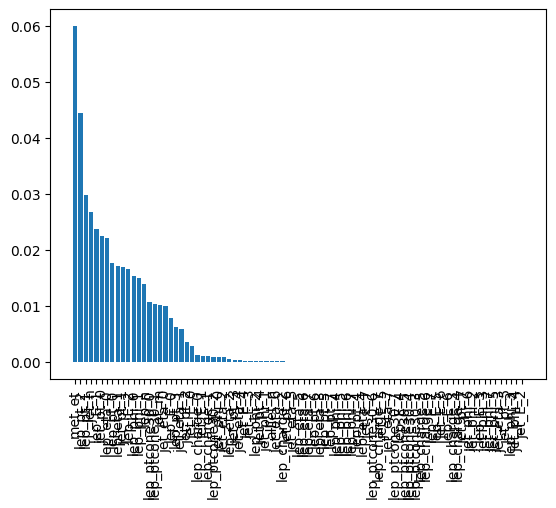

In [5]:
xgb_model = xgb.XGBClassifier()         
xgb_model.fit(X_train[features],y_train)
y_pred = xgb_model.predict(X_test[features])
acc = accuracy_score( y_test,y_pred)
perm_importance = permutation_importance(xgb_model, X_test[features], y_test).importances_mean
sort = np.argsort(perm_importance)
sorted_features = np.take_along_axis(np.array(features), sort, axis=0)[::-1]
height = perm_importance[sort][::-1]
sorted_features
plt.bar(sorted_features,height)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84],
 [Text(0, 0, 'met_et'),
  Text(1, 0, 'lep_pt_2'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_E_1'),
  Text(5, 0, 'jet_pt_0'),
  Text(6, 0, 'lep_eta_0'),
  Text(7, 0, 'lep_pt_0'),
  Text(8, 0, 'lep_eta_1'),
  Text(9, 0, 'jet_pt_1'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_phi_0'),
  Text(12, 0, 'lep_phi_1'),
  Text(13, 0, 'lep_n'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'lep_ptcone30_1'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'jet_eta_0'),
  Text(18, 0, 'lep_

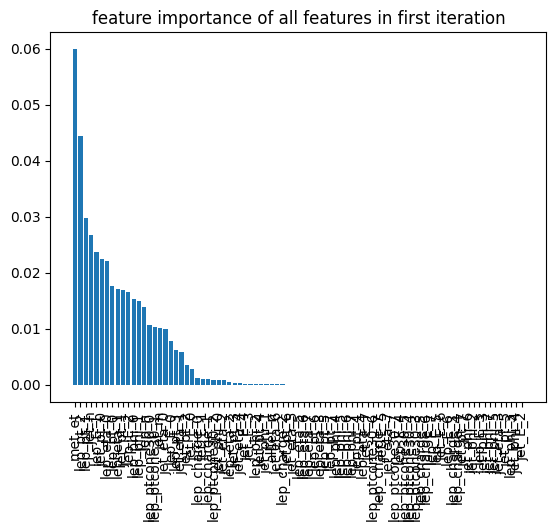

In [27]:
plt.title('feature importance of all features in first iteration')
plt.bar(sorted_features,height)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, 'met_et'),
  Text(1, 0, 'lep_pt_2'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_E_1'),
  Text(5, 0, 'jet_pt_0'),
  Text(6, 0, 'lep_eta_0'),
  Text(7, 0, 'lep_pt_0'),
  Text(8, 0, 'lep_eta_1'),
  Text(9, 0, 'jet_pt_1'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_phi_0'),
  Text(12, 0, 'lep_phi_1'),
  Text(13, 0, 'lep_n'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'lep_ptcone30_1'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'jet_eta_0'),
  Text(18, 0, 'lep_E_0'),
  Text(19, 0, 'lep_pt_3'),
  Text(20, 0, 'jet_eta_1'),
  Text(21, 0, 'jet_pt_2'),
  Text(22, 0, 'jet_E_0'),
  Text(23, 0, 'lep_charge_0'),
  Te

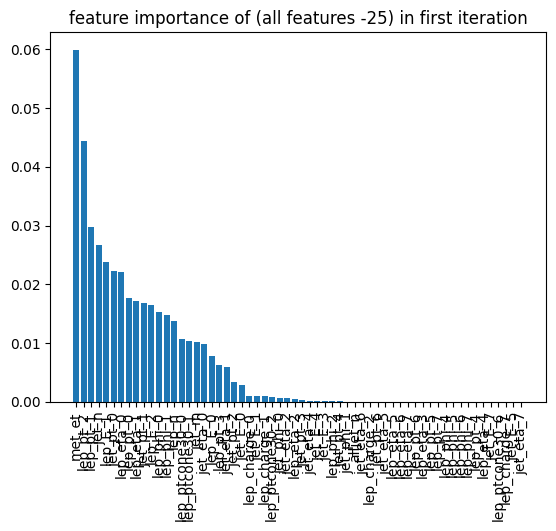

In [29]:
plt.title('feature importance of (all features -25) in first iteration')
plt.bar(sorted_features[:-25],height[:-25])
plt.xticks(rotation = 90)

In [22]:
sorted_new_1 = sorted_features[:-25]
#height_new_1 = height[:-25]

In [26]:
xgb_model = xgb.XGBClassifier()         
xgb_model.fit(X_train[sorted_new_1],y_train)
y_pred = xgb_model.predict(X_test[sorted_new_1])
acc = accuracy_score( y_test,y_pred)
perm_importance = permutation_importance(xgb_model, X_test[sorted_new_1], y_test).importances_mean
sort = np.argsort(perm_importance)
sorted_features_2 = np.take_along_axis(np.array(sorted_new_1), sort, axis=0)[::-1]
height_new_2 = perm_importance[sort][::-1]
#sorted_features
#plt.bar(sorted_features[:-30],height[:-30])
#plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, 'lep_pt_2'),
  Text(1, 0, 'met_et'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_eta_0'),
  Text(5, 0, 'lep_E_1'),
  Text(6, 0, 'lep_eta_1'),
  Text(7, 0, 'jet_pt_0'),
  Text(8, 0, 'jet_pt_1'),
  Text(9, 0, 'lep_pt_0'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_phi_0'),
  Text(12, 0, 'lep_phi_1'),
  Text(13, 0, 'jet_eta_0'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'lep_ptcone30_1'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'lep_E_0'),
  Text(18, 0, 'lep_pt_3'),
  Text(19, 0, 'jet_eta_1'),
  Text(20, 0, 'jet_pt_2'),
  Text(21, 0, 'jet_E_0'),
  Text(22, 0, 'jet_eta_2'),
  Text(23, 0, 'jet_phi_0'),
  T

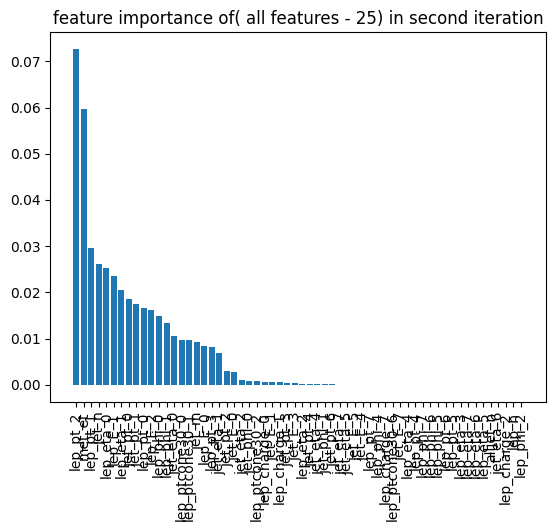

In [30]:
plt.title('feature importance of( all features - 25) in second iteration')
plt.bar(sorted_features_2,height_new_2)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'lep_pt_2'),
  Text(1, 0, 'met_et'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_eta_0'),
  Text(5, 0, 'lep_E_1'),
  Text(6, 0, 'lep_eta_1'),
  Text(7, 0, 'jet_pt_0'),
  Text(8, 0, 'jet_pt_1'),
  Text(9, 0, 'lep_pt_0'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_phi_0'),
  Text(12, 0, 'lep_phi_1'),
  Text(13, 0, 'jet_eta_0'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'lep_ptcone30_1'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'lep_E_0'),
  Text(18, 0, 'lep_pt_3'),
  Text(19, 0, 'jet_eta_1'),
  Text(20, 0, 'jet_pt_2'),
  Text(21, 0, 'jet_E_0'),
  Text(22, 0, 'jet_eta_2'),
  Text(23, 0, 'jet_phi_0'),
  Text(24, 0, 'lep_ptcone30_2'),
  Text(25, 0, 'lep_charge_0'),
  Text(26, 0, 'jet_E_1'),
  Text(27, 0, 'lep_charge_1'),
  Text(28, 0, 'jet_pt_3'),
  Tex

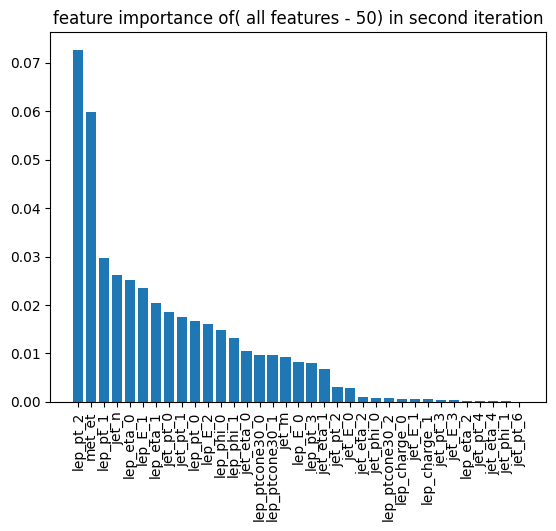

In [31]:
plt.title('feature importance of( all features - 50) in second iteration')
plt.bar(sorted_features_2[:-25],height_new_2[:-25])
plt.xticks(rotation = 90)

In [32]:
features_new_3 = sorted_features_2[:-25]

In [34]:
xgb_model = xgb.XGBClassifier()         
xgb_model.fit(X_train[features_new_3],y_train)
y_pred = xgb_model.predict(X_test[features_new_3])
acc = accuracy_score( y_test,y_pred)
perm_importance = permutation_importance(xgb_model, X_test[features_new_3], y_test).importances_mean
sort = np.argsort(perm_importance)
sorted_features_3 = np.take_along_axis(np.array(sorted_new_1), sort, axis=0)[::-1]
height_new_3 = perm_importance[sort][::-1]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'lep_pt_2'),
  Text(1, 0, 'met_et'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_eta_0'),
  Text(5, 0, 'lep_E_1'),
  Text(6, 0, 'lep_eta_1'),
  Text(7, 0, 'jet_pt_0'),
  Text(8, 0, 'jet_pt_1'),
  Text(9, 0, 'lep_pt_0'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_phi_0'),
  Text(12, 0, 'lep_phi_1'),
  Text(13, 0, 'jet_eta_0'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'lep_ptcone30_1'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'lep_E_0'),
  Text(18, 0, 'lep_pt_3'),
  Text(19, 0, 'jet_eta_1'),
  Text(20, 0, 'jet_pt_2'),
  Text(21, 0, 'jet_E_0'),
  Text(22, 0, 'jet_eta_2'),
  Text(23, 0, 'jet_phi_0'),
  Text(24, 0, 'lep_ptcone30_2'),
  Text(25, 0, 'lep_charge_0'),
  Text(26, 0, 'jet_E_1'),
  Text(27, 0, 'lep_charge_1'),
  Text(28, 0, 'jet_pt_3'),
  Tex

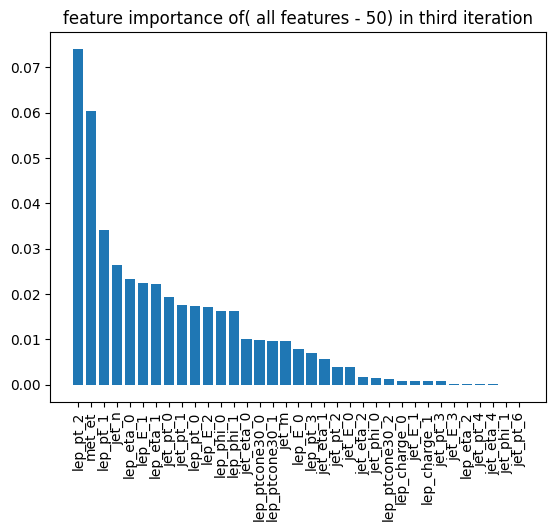

In [36]:
plt.title('feature importance of( all features - 50) in third iteration')
plt.bar(features_new_3,height_new_3)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'lep_pt_2'),
  Text(1, 0, 'met_et'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_eta_0'),
  Text(5, 0, 'lep_E_1'),
  Text(6, 0, 'lep_eta_1'),
  Text(7, 0, 'jet_pt_0'),
  Text(8, 0, 'jet_pt_1'),
  Text(9, 0, 'lep_pt_0'),
  Text(10, 0, 'lep_E_2'),
  Text(11, 0, 'lep_phi_0'),
  Text(12, 0, 'lep_phi_1'),
  Text(13, 0, 'jet_eta_0'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'lep_ptcone30_1'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'lep_E_0'),
  Text(18, 0, 'lep_pt_3'),
  Text(19, 0, 'jet_eta_1')])

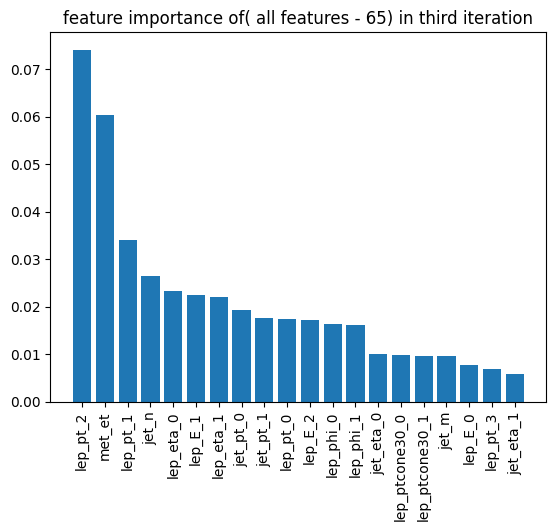

In [37]:
plt.title('feature importance of( all features - 65) in third iteration')
plt.bar(features_new_3[:-15],height_new_3[:-15])
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'lep_pt_2'),
  Text(1, 0, 'met_et'),
  Text(2, 0, 'lep_pt_1'),
  Text(3, 0, 'jet_n'),
  Text(4, 0, 'lep_E_1'),
  Text(5, 0, 'jet_pt_0'),
  Text(6, 0, 'lep_eta_0'),
  Text(7, 0, 'jet_pt_1'),
  Text(8, 0, 'lep_pt_0'),
  Text(9, 0, 'lep_E_2'),
  Text(10, 0, 'lep_eta_1'),
  Text(11, 0, 'lep_phi_1'),
  Text(12, 0, 'lep_phi_0'),
  Text(13, 0, 'lep_ptcone30_1'),
  Text(14, 0, 'lep_ptcone30_0'),
  Text(15, 0, 'jet_eta_0'),
  Text(16, 0, 'jet_m'),
  Text(17, 0, 'lep_E_0'),
  Text(18, 0, 'jet_eta_1'),
  Text(19, 0, 'jet_pt_2'),
  Text(20, 0, 'lep_pt_3'),
  Text(21, 0, 'jet_E_0'),
  Text(22, 0, 'lep_charge_1'),
  Text(23, 0, 'lep_charge_0'),
  Text(24, 0, 'lep_E_3')])

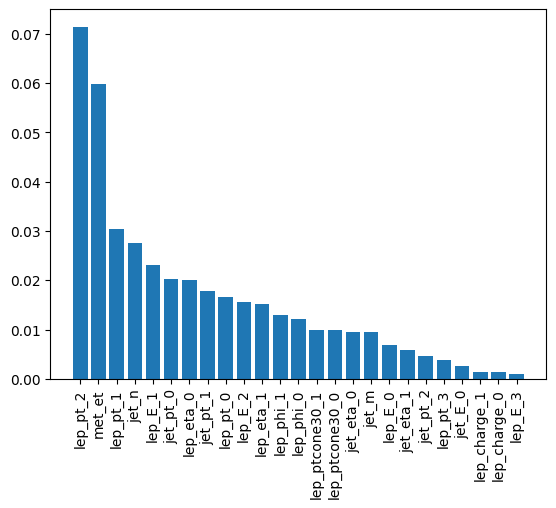

In [37]:
plt.bar(sorted_features[:-30],height[:-30])
plt.xticks(rotation = 90)

In [38]:
features = ['lep_pt_2','met_et','lep_pt_1','jet_n','lep_E_1','jet_pt_0','lep_eta_0','jet_pt_1','lep_pt_0','lep_E_2','lep_eta_1','lep_phi_1','lep_phi_0',
            'lep_ptcone30_1','lep_ptcone30_0','jet_eta_0','jet_m','lep_E_0','jet_eta_1','jet_pt_2','lep_pt_3','jet_E_0','lep_charge_1','lep_charge_0','lep_E_3']

25

In [ ]:
def feature_reduction_XGB(df,X_train, y_train, X_test, y_test, features, num_remaining_feature, print_bool):
    # Definition of tracking variables and lists to be filled during the reduction process
    num_of_features = len(features)
    max_num_of_iterations = num_of_features - num_remaining_feature
    iteration = 0
    accuracy_list = []
    AUC_list = []
    for it in range(max_num_of_iterations):          # Primary loop to iterativly remove features
        xgb_model = xgb.XGBClassifier()              # Reset model for each iteration
        xgb_model.fit(X_train[features],y_train)     # Train the model on the remaaining features
        # Validation of current model
        y_pred = xgb_model.predict(X_test[features])
        acc = accuracy_score( y_test,y_pred)
        accuracy_list.append(acc)
        if True:
            print(f'Iteratio:{it}, number of remaining features:{num_of_features-it}, Accuracy:{acc }')
        # Calculate the permutative feature importance using sklearn
        perm_importance = permutation_importance(xgb_model, X_test[features], y_test).importances_mean
        sort = np.argsort(perm_importance)
        sorted_features = np.take_along_axis(np.array(features), sort, axis=0)[::-1]
        height = perm_importance[sort][::-1]
        # Plot the feaute importances and correlation matrix
        if ((it%10 == 0) and print_bool) or (num_of_features-it) == 10  :
            #plt.rcParams['font.size'] = '25'
            fig, ax = plt.subplots(1,2,figsize = [4,2])
            ax[0].tick_params(labelrotation=90)
            ax[0].bar(x = sorted_features, height= height)
            ax[0].set_ylabel("permutative feature importance")
            d = df[sorted_features]
            corr = d[sorted_features].corr()
            mask = np.triu(np.ones_like(corr, dtype=bool))
            cmap = sns.diverging_palette(230, 20, as_cmap=True)
            # Draw the heatmap for the correlation
            sns.heatmap(corr, mask=mask, cmap='seismic', vmax=1,vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax[1])
        # Loop to retrain the model while individually removing one of the 3 least important features
        # Check wich of these has the least impact on the training, then reomve that feature from the feature list
        if (num_of_features-it) == 10:
            return_list = list(sorted_features)
            return_list.append(acc)
            return_list.append(height)
            #return_height = height
        temp_acc_list = []
        for ter_it in range(3):
            temp_s_f = list(sorted_features[-3:])
            temp_features = list(sorted_features)
            temp_features.pop(len(sorted_features) -1 - ter_it)
            #print(list(features))
            #print(temp_features)
            xgb_test_model = xgb.XGBClassifier()
            xgb_test_model.fit(X_train[temp_features],y_train)
            y_pred = xgb_test_model.predict(X_test[temp_features])
            temp_acc_list.append(accuracy_score( y_test ,y_pred))
        #print(temp_acc_list)
        #print(np.argmax(temp_acc_list), np.max(temp_acc_list))
        sorted_features = list(sorted_features)
        sorted_features.pop(len(sorted(features))-1-np.argmax(temp_acc_list))
        features = sorted_features
        if ((num_of_features-it) < 6) and print_bool:
            print(features)
    if print_bool:
        plt.figure()
        plt.xticks(np.arange(1,max_num_of_iterations+1))
        plt.plot( accuracy_list, ".")
        plt.ylim(0.75,1)
        plt.title(f"feature reduction starting from {num_of_features} features")
        plt.ylabel("Accuracy on test set")
        plt.xlabel("Number of removed features")
        plt.grid()
        plt.show()

    return return_list#, return_height
        
    